In [ ]:
pip install rdkit-pypi

     |████████████████████████████████| 22.5 MB 74.7 MB/s 


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.QED import qed
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt

the SMILES of molecules in ZINC dataset. 
 http://zinc.docking.org/

In [ ]:
num_mols = 5000 #다 이해할 필요는 없음
f = open('0412 smiles.txt', 'r') #r을 f라는 변수로 read 한다
contents = f.readlines()

fps_total = []
logP_total = []

for i in range(num_mols):
    smi = contents[i].split()[0] #smiles txt에서 하나를 가져와서 지정
    m = Chem.MolFromSmiles(smi) #molecule 구조
    fp = AllChem.GetMorganFingerprintAsBitVect(m,2) #fp 는 fingerprint
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    fps_total.append(arr)
    logP_total.append(MolLogP(m))
    
fps_total = np.asarray(fps_total)
logP_total = np.asarray(logP_total)

Then split the total dataset to a training and test set.

In [ ]:
num_total = fps_total.shape[0]
num_train = int(num_total*0.75)

num_total, num_train, (num_total-num_train)

(5000, 4000, 1000)

In [ ]:
fps_train = fps_total[0:num_train]
logP_train = logP_total[0:num_train]
fps_test = fps_total[num_train:]
logP_test = logP_total[num_train:]

a polynomial kernel and coefficients of the kernel as 5.0.

In [ ]:
_gamma = 5.0 #support vector regression 이용
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
clf = SVR(kernel='poly' ,gamma=_gamma)
clf.fit(fps_train, logP_train) #model 선정 후 training하는 것

SVR(gamma=5.0, kernel='poly')

In [ ]:
logP_pred = clf.predict(fps_test) #logP_pred랑 logP_test 비교해야됨
r2 = r2_score(logP_test, logP_pred)
mse = mean_squared_error(logP_test, logP_pred)
r2, mse #결과를 봐도 잘 모르겠으니 그래프를 그리자
#linear (0.6928536060740835, 0.5128344159228625)
#poly (0.7598955374744331, 0.40089623135693314) 
#rbf (0.1030053133880332, 1.4976889043519528)
#sigmoid (-2838.3513220151594, 4740.791705914236)
#precomputed 

(-2838.3513220151594, 4740.791705914236)

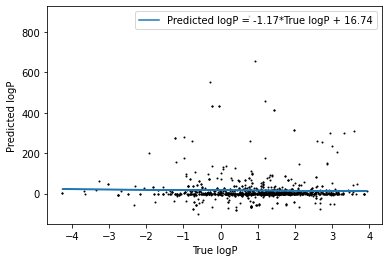

In [ ]:
slope, intercept, r_value, p_value, std_error = stats.linregress(logP_test, logP_pred) #선형 regression 통해서 slope 랑 intercept까지 찾는다
yy = slope*logP_test+intercept
plt.scatter(logP_test, logP_pred, color='black', s=1) #scatter plot 하겠다
plt.plot(logP_test, yy, label='Predicted logP = '+str(round(slope,2))+'*True logP + '+str(round(intercept,2)))
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()